# Experiment 2
Evaluating correlation between SpotNMatch scores and deconvolution accuracy.

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

from scstmatch.matching import SPOTLightMatcher
from scstmatch.data import SingleCellDataset, SpatialTranscriptomicsDataset
from analysis.cell_based_selector import cell_based_analysis

## Datasets
We will use the same four datasets for this test, each testing a combination of mismatches.
We have excluded the gender mismatch as it tends to contribute very little.

In [2]:
DATA_PATH = "../../../data"
REFERENCE_PATH = f"{DATA_PATH}/reference"
REFERENCE_DATASETS = {
    ("Harvard", "full", "F"): f"{REFERENCE_PATH}/hca_harvard_gender_Female.sc.h5ad",
    ("Harvard", "V1", "F"): f"{REFERENCE_PATH}/hca_harvard_gender_Female_-muscles.sc.h5ad",
    ("Harvard", "V2", "F"): f"{REFERENCE_PATH}/hca_harvard_gender_Female_-endothelial.sc.h5ad",
    ("Sanger", "full", "F"): f"{REFERENCE_PATH}/hca_sanger_gender_Female.sc.h5ad",
    ("Sanger", "V1", "F"): f"{REFERENCE_PATH}/hca_sanger_gender_Female_-muscles.sc.h5ad",
    ("Sanger", "V2", "F"): f"{REFERENCE_PATH}/hca_sanger_gender_Female_-endothelial.sc.h5ad",
}

TARGET_PATH = f"{DATA_PATH}/st"
TARGET_DATASETS = {
    ("Harvard", "full", "F1"): f"{TARGET_PATH}/hca_harvard_donor_H6.st.h5ad",
    ("Harvard", "V1", "F1"): f"{TARGET_PATH}/hca_harvard_donor_H6_-muscles.st.h5ad",
    ("Harvard", "V2", "F1"): f"{TARGET_PATH}/hca_harvard_donor_H6_-endothelial.st.h5ad",
    ("Sanger", "full", "F1"): f"{TARGET_PATH}/hca_sanger_donor_D5.st.h5ad",
    ("Sanger", "V1", "F1"): f"{TARGET_PATH}/hca_sanger_donor_D5_-muscles.st.h5ad",
    ("Sanger", "V2", "F1"): f"{TARGET_PATH}/hca_sanger_donor_D5_-endothelial.st.h5ad",
    ("Harvard", "full", "F2"): f"{TARGET_PATH}/hca_harvard_donor_H7.st.h5ad",
    ("Harvard", "V1", "F2"): f"{TARGET_PATH}/hca_harvard_donor_H7_-muscles.st.h5ad",
    ("Harvard", "V2", "F2"): f"{TARGET_PATH}/hca_harvard_donor_H7_-endothelial.st.h5ad",
    ("Sanger", "full", "F2"): f"{TARGET_PATH}/hca_sanger_donor_D1.st.h5ad",
    ("Sanger", "V1", "F2"): f"{TARGET_PATH}/hca_sanger_donor_D1_-muscles.st.h5ad",
    ("Sanger", "V2", "F2"): f"{TARGET_PATH}/hca_sanger_donor_D1_-endothelial.st.h5ad",
}

# Precomputed gene selection
GENES = ['ABCA6', 'ABCA8', 'ABCA9', 'ACACB', 'ACSL1', 'ACTA2', 'ADGRB3', 'ANK3',
         'ANKRD44', 'ANO2', 'ARHGAP15', 'BCL2', 'BICC1', 'BTNL9', 'CADM2',
         'CADPS', 'CARMIL1', 'CARMN', 'CCND3', 'CD163', 'CDC42SE2', 'CDH19',
         'CMYA5', 'CTNNA3', 'DCN', 'DLC1', 'DOCK2', 'EGFL7', 'EGFLAM', 'EHBP1',
         'ELMO1', 'EPS8', 'ERBB4', 'FHL2', 'FKBP5', 'FMN1', 'FRMD3', 'FRMD4B',
         'FYN', 'GNAQ', 'GPAM', 'GRIP1', 'GUCY1A2', 'ID1', 'IKZF1', 'IQGAP2',
         'KCNAB1', 'LAMA2', 'LDB2', 'LINC02248', 'LIPE-AS1', 'LRMDA', 'MAPK10',
         'MGST1', 'MLIP', 'MYBPC3', 'MYH11', 'MYH6', 'MYL7', 'NEAT1', 'NEGR1',
         'NR2F2-AS1', 'NRXN1', 'NRXN3', 'NTRK3', 'PAM', 'PARP8', 'PDE3B',
         'PDE4DIP', 'PDGFRB', 'PID1', 'PLA2G5', 'PLIN1', 'PNPLA2', 'PRKG1',
         'PTPRB', 'PTPRC', 'RABGAP1L', 'RBM47', 'RGS5', 'RORA', 'RYR2', 'SCN7A',
         'SGCD', 'SKAP1', 'SLC8A1', 'SLIT3', 'SOX5', 'ST6GALNAC3', 'SYNE1',
         'TBXAS1', 'TRDN-AS1', 'TTN', 'VWF', 'ZFHX3']

## Generate Table Data
We will generate a scatter plot grid of the separate results.

In [4]:
def correlate_results(reference, target):
    scores = SPOTLightMatcher().match(reference, target)[3]
    accuracy = cell_based_analysis(reference.anndata[:, GENES].copy(), target.anndata[:, GENES].copy())
    return scores, accuracy

results = {}

for reference_key, reference_path in REFERENCE_DATASETS.items():
    reference = SingleCellDataset.read(reference_path)
    for target_key, target_path in TARGET_DATASETS.items():
        target = SpatialTranscriptomicsDataset.read(target_path)
        results[(reference_key, target_key)] = correlate_results(reference, target)

0.016938s	init
5.914231s	load
0.951057s	hvg
3.218726s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 192.57it/s]


JSD: mean=0.2107207477092743, quartiles=[0.     0.1163 0.2231 0.2878 0.5266]
RMSE: all=0.07237403094768524, quartiles=[0.     0.0447 0.0632 0.0894 0.2683]
RMSE: all=0.07237403094768524, quartiles=[0.     0.0447 0.0632 0.0894 0.2683]
0.019601s	init
5.963565s	load
0.905303s	hvg
3.249056s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 212.06it/s]


JSD: mean=0.2057221680879593, quartiles=[0.     0.1062 0.2077 0.2878 0.513 ]
RMSE: all=0.07072481513023376, quartiles=[0.     0.0447 0.0632 0.0775 0.2145]
RMSE: all=0.07072481513023376, quartiles=[0.     0.0447 0.0632 0.0775 0.2145]
0.018188s	init
5.657368s	load
0.791635s	hvg
3.028008s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 192.89it/s]


JSD: mean=0.20556381344795227, quartiles=[0.     0.1163 0.2077 0.2839 0.4945]
RMSE: all=0.0716240182518959, quartiles=[0.     0.0447 0.0632 0.0894 0.1789]
RMSE: all=0.0716240182518959, quartiles=[0.     0.0447 0.0632 0.0894 0.1789]
0.018092s	init
5.745702s	load
0.731897s	hvg
2.923323s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 205.35it/s]


JSD: mean=0.32715699076652527, quartiles=[0.     0.2131 0.3247 0.4155 0.8326]
RMSE: all=0.12375929951667786, quartiles=[0.     0.0426 0.0853 0.1206 0.4264]
RMSE: all=0.12375929951667786, quartiles=[0.     0.0426 0.0853 0.1206 0.4264]
0.021612s	init
5.846010s	load
0.693963s	hvg
2.877281s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 201.60it/s]


JSD: mean=0.337077260017395, quartiles=[0.     0.2077 0.3247 0.4544 0.8326]
RMSE: all=0.13393349945545197, quartiles=[0.     0.0559 0.0953 0.143  0.4068]
RMSE: all=0.13393349945545197, quartiles=[0.     0.0559 0.0953 0.143  0.4068]
0.018675s	init
5.831789s	load
0.702422s	hvg
2.861742s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 212.71it/s]


JSD: mean=0.3236944377422333, quartiles=[0.     0.197  0.3195 0.4184 0.8326]
RMSE: all=0.12081541121006012, quartiles=[0.     0.0426 0.0853 0.1206 0.4264]
RMSE: all=0.12081541121006012, quartiles=[0.     0.0426 0.0853 0.1206 0.4264]
0.018113s	init
5.520451s	load
0.739630s	hvg
2.911288s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 212.17it/s]


JSD: mean=0.2167540192604065, quartiles=[0.     0.1449 0.221  0.2938 0.5353]
RMSE: all=0.07404052466154099, quartiles=[0.     0.0447 0.0632 0.0894 0.228 ]
RMSE: all=0.07404052466154099, quartiles=[0.     0.0447 0.0632 0.0894 0.228 ]
0.016791s	init
5.544146s	load
0.760012s	hvg
3.091749s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 206.16it/s]


JSD: mean=0.20911355316638947, quartiles=[0.     0.1163 0.2077 0.2824 0.563 ]
RMSE: all=0.07313001900911331, quartiles=[0.     0.0447 0.0632 0.0894 0.2366]
RMSE: all=0.07313001900911331, quartiles=[0.     0.0447 0.0632 0.0894 0.2366]
0.020636s	init
5.810063s	load
0.745322s	hvg
3.041497s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 204.74it/s]


JSD: mean=0.21825216710567474, quartiles=[0.     0.1554 0.227  0.2938 0.5809]
RMSE: all=0.07569676637649536, quartiles=[0.     0.0447 0.0632 0.0894 0.2324]
RMSE: all=0.07569676637649536, quartiles=[0.     0.0447 0.0632 0.0894 0.2324]
0.017844s	init
5.628734s	load
0.679979s	hvg
2.860392s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 195.58it/s]


JSD: mean=0.34063196182250977, quartiles=[0.     0.1901 0.316  0.4579 0.8326]
RMSE: all=0.14268210530281067, quartiles=[0.     0.0426 0.0853 0.1348 0.4068]
RMSE: all=0.14268210530281067, quartiles=[0.     0.0426 0.0853 0.1348 0.4068]
0.018736s	init
5.981738s	load
0.690148s	hvg
2.838400s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 203.04it/s]


JSD: mean=0.35945743322372437, quartiles=[0.     0.1922 0.3249 0.4919 0.8326]
RMSE: all=0.15369391441345215, quartiles=[0.     0.0426 0.0853 0.1477 0.4264]
RMSE: all=0.15369391441345215, quartiles=[0.     0.0426 0.0853 0.1477 0.4264]
0.019696s	init
5.702348s	load
0.667966s	hvg
2.965289s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 197.87it/s]


JSD: mean=0.34076711535453796, quartiles=[0.     0.1906 0.3197 0.4695 0.8326]
RMSE: all=0.13847218453884125, quartiles=[0.     0.0426 0.0853 0.1279 0.4068]
RMSE: all=0.13847218453884125, quartiles=[0.     0.0426 0.0853 0.1279 0.4068]
0.007866s	init
2.183844s	load
0.822960s	hvg
1.216639s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 220.51it/s]


JSD: mean=0.359195351600647, quartiles=[0.     0.192  0.3247 0.4945 0.8326]
RMSE: all=0.169002965092659, quartiles=[0.     0.0447 0.0894 0.1342 0.4472]
RMSE: all=0.169002965092659, quartiles=[0.     0.0447 0.0894 0.1342 0.4472]
0.008476s	init
2.363982s	load
0.700282s	hvg
1.119743s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 224.53it/s]


JSD: mean=0.20025253295898438, quartiles=[0.     0.1021 0.1992 0.282  0.513 ]
RMSE: all=0.07818248122930527, quartiles=[0.     0.05   0.05   0.0866 0.2398]
RMSE: all=0.07818248122930527, quartiles=[0.     0.05   0.05   0.0866 0.2398]
0.007721s	init
2.288336s	load
0.731911s	hvg
1.194484s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 217.50it/s]


JSD: mean=0.38225340843200684, quartiles=[0.     0.1913 0.328  0.538  0.8326]
RMSE: all=0.18011662364006042, quartiles=[0.     0.0447 0.0894 0.1549 0.4472]
RMSE: all=0.18011662364006042, quartiles=[0.     0.0447 0.0894 0.1549 0.4472]
0.008704s	init
2.272708s	load
0.646675s	hvg
1.162100s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 226.95it/s]


JSD: mean=0.43218860030174255, quartiles=[0.     0.2736 0.4183 0.5809 0.8326]
RMSE: all=0.17724661529064178, quartiles=[0.     0.0739 0.1128 0.1821 0.4264]
RMSE: all=0.17724661529064178, quartiles=[0.     0.0739 0.1128 0.1821 0.4264]
0.006954s	init
2.200402s	load
0.628645s	hvg
1.180507s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 216.28it/s]


JSD: mean=0.33452263474464417, quartiles=[0.     0.2077 0.3247 0.4506 0.8326]
RMSE: all=0.14853356778621674, quartiles=[0.     0.0471 0.1054 0.1563 0.4497]
RMSE: all=0.14853356778621674, quartiles=[0.     0.0471 0.1054 0.1563 0.4497]
0.007921s	init
2.314561s	load
0.642968s	hvg
1.157346s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 213.04it/s]


JSD: mean=0.4457470178604126, quartiles=[0.     0.2736 0.4264 0.6227 0.8326]
RMSE: all=0.18381313979625702, quartiles=[0.     0.0739 0.1206 0.1954 0.4264]
RMSE: all=0.18381313979625702, quartiles=[0.     0.0739 0.1206 0.1954 0.4264]
0.009355s	init
2.230105s	load
0.692450s	hvg
1.260945s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 219.82it/s]


JSD: mean=0.35749274492263794, quartiles=[0.     0.1897 0.3247 0.4981 0.8326]
RMSE: all=0.175863578915596, quartiles=[0.     0.0447 0.0775 0.1414 0.4472]
RMSE: all=0.175863578915596, quartiles=[0.     0.0447 0.0775 0.1414 0.4472]
0.007563s	init
2.123565s	load
0.673074s	hvg
1.174517s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 218.26it/s]


JSD: mean=0.1997292935848236, quartiles=[0.     0.1056 0.1992 0.2763 0.5238]
RMSE: all=0.08017168939113617, quartiles=[0.     0.05   0.05   0.0866 0.2646]
RMSE: all=0.08017168939113617, quartiles=[0.     0.05   0.05   0.0866 0.2646]
0.008012s	init
2.275759s	load
0.722343s	hvg
1.235234s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 222.43it/s]


JSD: mean=0.38957616686820984, quartiles=[0.     0.1956 0.3389 0.5579 0.8326]
RMSE: all=0.18782438337802887, quartiles=[0.     0.0447 0.0894 0.1673 0.4472]
RMSE: all=0.18782438337802887, quartiles=[0.     0.0447 0.0894 0.1673 0.4472]
0.009801s	init
2.181552s	load
0.620631s	hvg
1.205947s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 216.70it/s]


JSD: mean=0.4626738727092743, quartiles=[0.     0.2736 0.456  0.6585 0.8326]
RMSE: all=0.2053954005241394, quartiles=[0.     0.0739 0.1279 0.2594 0.4264]
RMSE: all=0.2053954005241394, quartiles=[0.     0.0739 0.1279 0.2594 0.4264]
0.007987s	init
2.248178s	load
0.619691s	hvg
1.108928s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 237.41it/s]


JSD: mean=0.35515904426574707, quartiles=[0.     0.1906 0.3247 0.4883 0.8326]
RMSE: all=0.1695287525653839, quartiles=[0.     0.0471 0.0943 0.1633 0.4714]
RMSE: all=0.1695287525653839, quartiles=[0.     0.0471 0.0943 0.1633 0.4714]
0.007044s	init
2.110123s	load
0.611063s	hvg
1.105467s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 234.26it/s]


JSD: mean=0.48832106590270996, quartiles=[0.     0.2736 0.4743 0.7422 0.8326]
RMSE: all=0.215119406580925, quartiles=[0.     0.0739 0.1348 0.2804 0.4264]
RMSE: all=0.215119406580925, quartiles=[0.     0.0739 0.1348 0.2804 0.4264]
0.015275s	init
5.472198s	load
0.795856s	hvg
2.729821s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 221.65it/s]


JSD: mean=0.26945391297340393, quartiles=[0.     0.1897 0.2736 0.347  0.8326]
RMSE: all=0.10953538864850998, quartiles=[0.     0.0447 0.0775 0.1    0.3924]
RMSE: all=0.10953538864850998, quartiles=[0.     0.0447 0.0775 0.1    0.3924]
0.017298s	init
5.507769s	load
0.774360s	hvg
2.766359s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 215.62it/s]


JSD: mean=0.2792816162109375, quartiles=[0.     0.1897 0.2693 0.3723 0.8326]
RMSE: all=0.1153169497847557, quartiles=[0.     0.0447 0.0775 0.1095 0.4472]
RMSE: all=0.1153169497847557, quartiles=[0.     0.0447 0.0775 0.1095 0.4472]
0.016016s	init
5.472109s	load
0.822392s	hvg
2.744277s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 212.63it/s]


JSD: mean=0.204870343208313, quartiles=[0.     0.1147 0.2077 0.2832 0.4945]
RMSE: all=0.07540999352931976, quartiles=[0.     0.0471 0.0667 0.0943 0.1886]
RMSE: all=0.07540999352931976, quartiles=[0.     0.0471 0.0667 0.0943 0.1886]
0.017369s	init
5.377233s	load
0.667956s	hvg
2.550091s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 215.72it/s]


JSD: mean=0.37404754757881165, quartiles=[0.     0.2633 0.3476 0.4868 0.8326]
RMSE: all=0.14475056529045105, quartiles=[0.     0.0603 0.0853 0.1537 0.4264]
RMSE: all=0.14475056529045105, quartiles=[0.     0.0603 0.0853 0.1537 0.4264]
0.017246s	init
5.516120s	load
0.677083s	hvg
2.538176s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 215.95it/s]


JSD: mean=0.3942961096763611, quartiles=[0.     0.2645 0.3834 0.5234 0.8326]
RMSE: all=0.15995453298091888, quartiles=[0.     0.0739 0.1128 0.1758 0.4264]
RMSE: all=0.15995453298091888, quartiles=[0.     0.0739 0.1128 0.1758 0.4264]
0.016356s	init
5.329224s	load
0.644985s	hvg
2.479682s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 226.08it/s]


JSD: mean=0.32251957058906555, quartiles=[0.     0.197  0.316  0.4183 0.8326]
RMSE: all=0.12753038108348846, quartiles=[0.     0.0447 0.0894 0.1265 0.4472]
RMSE: all=0.12753038108348846, quartiles=[0.     0.0447 0.0894 0.1265 0.4472]
0.016680s	init
5.261236s	load
0.768936s	hvg
2.591185s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 228.53it/s]


JSD: mean=0.2844069302082062, quartiles=[0.     0.1897 0.2736 0.3723 0.8326]
RMSE: all=0.11140017956495285, quartiles=[0.     0.0447 0.0775 0.1095 0.4099]
RMSE: all=0.11140017956495285, quartiles=[0.     0.0447 0.0775 0.1095 0.4099]
0.016618s	init
5.480080s	load
0.710264s	hvg
2.580842s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 221.75it/s]


JSD: mean=0.2876277565956116, quartiles=[0.     0.1897 0.2736 0.3738 0.8326]
RMSE: all=0.11608617752790451, quartiles=[0.     0.0447 0.0775 0.1095 0.4472]
RMSE: all=0.11608617752790451, quartiles=[0.     0.0447 0.0775 0.1095 0.4472]
0.016938s	init
5.521003s	load
0.729338s	hvg
2.706357s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 215.60it/s]


JSD: mean=0.21779301762580872, quartiles=[0.     0.1554 0.227  0.2938 0.5809]
RMSE: all=0.07976354658603668, quartiles=[0.     0.0471 0.0667 0.0943 0.2449]
RMSE: all=0.07976354658603668, quartiles=[0.     0.0471 0.0667 0.0943 0.2449]
0.016051s	init
5.351455s	load
0.678587s	hvg
2.440016s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 229.94it/s]


JSD: mean=0.3897570073604584, quartiles=[0.     0.2077 0.3723 0.5375 0.8326]
RMSE: all=0.16659694910049438, quartiles=[0.     0.0603 0.0953 0.1609 0.4068]
RMSE: all=0.16659694910049438, quartiles=[0.     0.0603 0.0953 0.1609 0.4068]
0.016174s	init
5.252585s	load
0.630457s	hvg
2.650784s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 226.55it/s]


JSD: mean=0.41668182611465454, quartiles=[0.     0.2633 0.3895 0.5767 0.8326]
RMSE: all=0.18006059527397156, quartiles=[0.     0.0739 0.1128 0.2045 0.4264]
RMSE: all=0.18006059527397156, quartiles=[0.     0.0739 0.1128 0.2045 0.4264]
0.015375s	init
5.488367s	load
0.678068s	hvg
2.562711s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 220.32it/s]


JSD: mean=0.33696165680885315, quartiles=[0.     0.1905 0.3171 0.4638 0.8326]
RMSE: all=0.15085753798484802, quartiles=[0.     0.0447 0.0894 0.1342 0.4266]
RMSE: all=0.15085753798484802, quartiles=[0.     0.0447 0.0894 0.1342 0.4266]
0.015060s	init
3.412677s	load
0.817251s	hvg
2.691755s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 200.39it/s]


JSD: mean=0.27983078360557556, quartiles=[0.     0.1935 0.2819 0.3531 0.7062]
RMSE: all=0.09254974126815796, quartiles=[0.     0.0426 0.0739 0.1128 0.286 ]
RMSE: all=0.09254974126815796, quartiles=[0.     0.0426 0.0739 0.1128 0.286 ]
0.014258s	init
3.435428s	load
0.791405s	hvg
2.823693s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 202.41it/s]


JSD: mean=0.265445351600647, quartiles=[0.     0.1901 0.2749 0.3456 0.609 ]
RMSE: all=0.08916787058115005, quartiles=[0.     0.0426 0.0739 0.1044 0.2796]
RMSE: all=0.08916787058115005, quartiles=[0.     0.0426 0.0739 0.1044 0.2796]
0.014385s	init
3.301351s	load
0.753464s	hvg
2.939653s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 192.07it/s]


JSD: mean=0.2802419364452362, quartiles=[0.     0.1992 0.2819 0.3634 0.6476]
RMSE: all=0.09258902072906494, quartiles=[0.     0.0426 0.0739 0.1128 0.2558]
RMSE: all=0.09258902072906494, quartiles=[0.     0.0426 0.0739 0.1128 0.2558]
0.015587s	init
3.503801s	load
0.716347s	hvg
2.861800s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 192.46it/s]


JSD: mean=0.2712051272392273, quartiles=[0.     0.1906 0.2749 0.35   0.762 ]
RMSE: all=0.08781179040670395, quartiles=[0.     0.0426 0.0739 0.0953 0.3838]
RMSE: all=0.08781179040670395, quartiles=[0.     0.0426 0.0739 0.0953 0.3838]
0.013903s	init
3.467500s	load
0.672367s	hvg
2.795560s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 187.38it/s]


JSD: mean=0.27185267210006714, quartiles=[0.     0.1901 0.2742 0.3537 0.8326]
RMSE: all=0.09120406955480576, quartiles=[0.     0.0426 0.0739 0.1044 0.3438]
RMSE: all=0.09120406955480576, quartiles=[0.     0.0426 0.0739 0.1044 0.3438]
0.016619s	init
3.305431s	load
0.637533s	hvg
2.748952s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 199.40it/s]


JSD: mean=0.2722933888435364, quartiles=[0.     0.1901 0.2749 0.35   0.8326]
RMSE: all=0.08883079141378403, quartiles=[0.     0.0426 0.0739 0.0953 0.3693]
RMSE: all=0.08883079141378403, quartiles=[0.     0.0426 0.0739 0.0953 0.3693]
0.013050s	init
3.288259s	load
0.725337s	hvg
2.533828s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 206.57it/s]


JSD: mean=0.285997211933136, quartiles=[0.     0.1956 0.2819 0.3742 0.6655]
RMSE: all=0.09585025906562805, quartiles=[0.     0.0426 0.0853 0.1128 0.2985]
RMSE: all=0.09585025906562805, quartiles=[0.     0.0426 0.0853 0.1128 0.2985]
0.013462s	init
3.297315s	load
0.728184s	hvg
2.788639s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 190.39it/s]


JSD: mean=0.2667909562587738, quartiles=[0.     0.1901 0.2736 0.35   0.6966]
RMSE: all=0.0888410210609436, quartiles=[0.     0.0426 0.0739 0.0953 0.2985]
RMSE: all=0.0888410210609436, quartiles=[0.     0.0426 0.0739 0.0953 0.2985]
0.015528s	init
3.472539s	load
0.770487s	hvg
2.554734s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 196.42it/s]


JSD: mean=0.29064294695854187, quartiles=[0.     0.2077 0.3    0.3807 0.6638]
RMSE: all=0.1001453548669815, quartiles=[0.     0.0603 0.0853 0.1128 0.2796]
RMSE: all=0.1001453548669815, quartiles=[0.     0.0603 0.0853 0.1128 0.2796]
0.014775s	init
3.467101s	load
0.681709s	hvg
2.938645s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 195.49it/s]


JSD: mean=0.2928205132484436, quartiles=[0.     0.1901 0.2878 0.4057 0.6792]
RMSE: all=0.10231857746839523, quartiles=[0.     0.0426 0.0739 0.1128 0.3411]
RMSE: all=0.10231857746839523, quartiles=[0.     0.0426 0.0739 0.1128 0.3411]
0.015431s	init
3.314251s	load
0.691507s	hvg
2.698964s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 193.07it/s]


JSD: mean=0.28120720386505127, quartiles=[0.     0.1901 0.2762 0.3742 0.725 ]
RMSE: all=0.09568889439105988, quartiles=[0.     0.0426 0.0739 0.0953 0.3838]
RMSE: all=0.09568889439105988, quartiles=[0.     0.0426 0.0739 0.0953 0.3838]
0.017884s	init
3.431121s	load
0.655715s	hvg
2.928392s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 196.66it/s]


JSD: mean=0.31226834654808044, quartiles=[0.     0.1956 0.3214 0.4264 0.7269]
RMSE: all=0.10893701761960983, quartiles=[0.     0.0426 0.0853 0.1206 0.3219]
RMSE: all=0.10893701761960983, quartiles=[0.     0.0426 0.0853 0.1206 0.3219]
0.008492s	init
1.265282s	load
0.816433s	hvg
0.794712s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 215.26it/s]


JSD: mean=0.4291967749595642, quartiles=[0.     0.2736 0.3807 0.5976 0.8326]
RMSE: all=0.18645983934402466, quartiles=[0.     0.0739 0.1128 0.1907 0.4264]
RMSE: all=0.18645983934402466, quartiles=[0.     0.0739 0.1128 0.1907 0.4264]
0.008321s	init
1.265095s	load
0.672810s	hvg
0.768691s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 213.67it/s]


JSD: mean=0.25744757056236267, quartiles=[0.     0.1897 0.2736 0.3425 0.609 ]
RMSE: all=0.09822876006364822, quartiles=[0.     0.0471 0.0816 0.1155 0.3091]
RMSE: all=0.09822876006364822, quartiles=[0.     0.0471 0.0816 0.1155 0.3091]
0.007207s	init
1.275305s	load
0.657718s	hvg
0.788958s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 205.37it/s]


JSD: mean=0.44282329082489014, quartiles=[0.     0.2736 0.4048 0.6094 0.8326]
RMSE: all=0.19390250742435455, quartiles=[0.     0.0739 0.1128 0.2045 0.4264]
RMSE: all=0.19390250742435455, quartiles=[0.     0.0739 0.1128 0.2045 0.4264]
0.007775s	init
1.291281s	load
0.612374s	hvg
0.790366s	nnls
training anew
caching training data


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 227.25it/s]


JSD: mean=0.3887004554271698, quartiles=[0.     0.2381 0.3472 0.5222 0.8326]
RMSE: all=0.1693839132785797, quartiles=[0.     0.0603 0.0953 0.1595 0.4264]
RMSE: all=0.1693839132785797, quartiles=[0.     0.0603 0.0953 0.1595 0.4264]
0.007588s	init
1.204706s	load
0.594132s	hvg
0.784579s	nnls
training anew


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 203.18it/s]


JSD: mean=0.26365625858306885, quartiles=[0.     0.1897 0.2736 0.3459 0.7322]
RMSE: all=0.09982206672430038, quartiles=[0.     0.0471 0.0816 0.1155 0.3801]
RMSE: all=0.09982206672430038, quartiles=[0.     0.0471 0.0816 0.1155 0.3801]
0.006441s	init
1.276027s	load
0.630006s	hvg
0.811900s	nnls
training anew


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 218.30it/s]


JSD: mean=0.40488001704216003, quartiles=[0.     0.235  0.355  0.5424 0.8326]
RMSE: all=0.17980292439460754, quartiles=[0.     0.0603 0.0953 0.1758 0.4264]
RMSE: all=0.17980292439460754, quartiles=[0.     0.0603 0.0953 0.1758 0.4264]
0.007676s	init
1.281482s	load
0.654558s	hvg
0.791592s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 216.16it/s]


JSD: mean=0.4320756793022156, quartiles=[0.     0.2613 0.3856 0.6243 0.8326]
RMSE: all=0.1935693472623825, quartiles=[0.     0.0603 0.1128 0.2132 0.4264]
RMSE: all=0.1935693472623825, quartiles=[0.     0.0603 0.1128 0.2132 0.4264]
0.006981s	init
1.229285s	load
0.664359s	hvg
0.797357s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 206.47it/s]


JSD: mean=0.26066315174102783, quartiles=[0.     0.1897 0.2736 0.3461 0.6579]
RMSE: all=0.09830790758132935, quartiles=[0.     0.0471 0.0816 0.1054 0.33  ]
RMSE: all=0.09830790758132935, quartiles=[0.     0.0471 0.0816 0.1054 0.33  ]
0.007888s	init
1.261570s	load
0.661534s	hvg
0.764804s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 218.59it/s]


JSD: mean=0.4600233733654022, quartiles=[0.     0.2736 0.4183 0.6865 0.8326]
RMSE: all=0.20609794557094574, quartiles=[0.     0.0739 0.1206 0.2567 0.4264]
RMSE: all=0.20609794557094574, quartiles=[0.     0.0739 0.1206 0.2567 0.4264]
0.007944s	init
1.318971s	load
0.658531s	hvg
0.851972s	nnls
training anew


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 206.83it/s]


JSD: mean=0.40950247645378113, quartiles=[0.     0.2223 0.3723 0.5767 0.8326]
RMSE: all=0.18648909032344818, quartiles=[0.     0.0426 0.0953 0.2045 0.4264]
RMSE: all=0.18648909032344818, quartiles=[0.     0.0426 0.0953 0.2045 0.4264]
0.009018s	init
1.277970s	load
0.708107s	hvg
0.769806s	nnls
training anew


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 215.59it/s]


JSD: mean=0.27359500527381897, quartiles=[0.     0.1901 0.2739 0.3683 0.725 ]
RMSE: all=0.10481730103492737, quartiles=[0.     0.0471 0.0816 0.1054 0.4243]
RMSE: all=0.10481730103492737, quartiles=[0.     0.0471 0.0816 0.1054 0.4243]
0.008418s	init
1.308216s	load
0.627146s	hvg
0.842791s	nnls
training anew


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 216.25it/s]


JSD: mean=0.43969061970710754, quartiles=[0.     0.2736 0.4188 0.6026 0.8326]
RMSE: all=0.1967092901468277, quartiles=[0.     0.0603 0.1128 0.2216 0.4264]
RMSE: all=0.1967092901468277, quartiles=[0.     0.0603 0.1128 0.2216 0.4264]
0.015533s	init
3.371098s	load
0.745067s	hvg
2.548551s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 199.20it/s]


JSD: mean=0.3358398973941803, quartiles=[0.     0.2315 0.328  0.4203 0.8326]
RMSE: all=0.1218046173453331, quartiles=[0.     0.0603 0.0853 0.1279 0.3885]
RMSE: all=0.1218046173453331, quartiles=[0.     0.0603 0.0853 0.1279 0.3885]
0.015227s	init
3.300642s	load
0.764616s	hvg
2.558072s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 201.40it/s]


JSD: mean=0.3380920886993408, quartiles=[0.     0.2223 0.3252 0.4264 0.8326]
RMSE: all=0.12436749041080475, quartiles=[0.     0.0603 0.0853 0.1279 0.4068]
RMSE: all=0.12436749041080475, quartiles=[0.     0.0603 0.0853 0.1279 0.4068]
0.015596s	init
3.282300s	load
0.782516s	hvg
2.615471s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 210.44it/s]


JSD: mean=0.2796003222465515, quartiles=[0.     0.1992 0.2818 0.3634 0.6476]
RMSE: all=0.09705668687820435, quartiles=[0.     0.0447 0.0775 0.1183 0.2683]
RMSE: all=0.09705668687820435, quartiles=[0.     0.0447 0.0775 0.1183 0.2683]
0.013233s	init
3.201365s	load
0.679534s	hvg
2.686104s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 201.26it/s]


JSD: mean=0.3169994056224823, quartiles=[0.     0.2131 0.3104 0.3956 0.8326]
RMSE: all=0.11169764399528503, quartiles=[0.     0.0426 0.0853 0.1128 0.4068]
RMSE: all=0.11169764399528503, quartiles=[0.     0.0426 0.0853 0.1128 0.4068]
0.016629s	init
3.234020s	load
0.632159s	hvg
2.424869s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 208.68it/s]


JSD: mean=0.33293968439102173, quartiles=[0.     0.2165 0.3142 0.424  0.8326]
RMSE: all=0.12297080457210541, quartiles=[0.     0.0426 0.0853 0.1206 0.3885]
RMSE: all=0.12297080457210541, quartiles=[0.     0.0426 0.0853 0.1206 0.3885]
0.012448s	init
3.223942s	load
0.650622s	hvg
2.637431s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 203.86it/s]


JSD: mean=0.2718640863895416, quartiles=[0.     0.1901 0.2749 0.35   0.8326]
RMSE: all=0.09309135377407074, quartiles=[0.     0.0447 0.0775 0.1    0.3873]
RMSE: all=0.09309135377407074, quartiles=[0.     0.0447 0.0775 0.1    0.3873]
0.014676s	init
3.217328s	load
0.690336s	hvg
2.328787s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 203.33it/s]


JSD: mean=0.3502959907054901, quartiles=[0.     0.2621 0.3425 0.4429 0.8326]
RMSE: all=0.12650547921657562, quartiles=[0.     0.0603 0.0953 0.1279 0.4068]
RMSE: all=0.12650547921657562, quartiles=[0.     0.0603 0.0953 0.1279 0.4068]
0.013782s	init
3.154077s	load
0.703386s	hvg
2.370859s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 211.15it/s]


JSD: mean=0.34015515446662903, quartiles=[0.     0.2077 0.325  0.4264 0.8326]
RMSE: all=0.1267782598733902, quartiles=[0.     0.0559 0.0853 0.1279 0.4264]
RMSE: all=0.1267782598733902, quartiles=[0.     0.0559 0.0853 0.1279 0.4264]
0.013524s	init
3.115671s	load
0.705814s	hvg
2.299104s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 203.54it/s]


JSD: mean=0.2903916537761688, quartiles=[0.     0.2077 0.3    0.3807 0.6638]
RMSE: all=0.10501428693532944, quartiles=[0.     0.0632 0.0894 0.1183 0.2933]
RMSE: all=0.10501428693532944, quartiles=[0.     0.0632 0.0894 0.1183 0.2933]
0.014218s	init
3.210464s	load
0.691450s	hvg
2.622668s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 203.61it/s]


JSD: mean=0.3370131254196167, quartiles=[0.     0.2077 0.3302 0.4409 0.8326]
RMSE: all=0.12882688641548157, quartiles=[0.     0.0426 0.0853 0.1279 0.4264]
RMSE: all=0.12882688641548157, quartiles=[0.     0.0426 0.0853 0.1279 0.4264]
0.013208s	init
3.329153s	load
0.730288s	hvg
2.572712s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:05<00:00, 198.14it/s]


JSD: mean=0.33165687322616577, quartiles=[0.     0.1935 0.3247 0.4433 0.8326]
RMSE: all=0.12782801687717438, quartiles=[0.     0.0426 0.0739 0.1279 0.4264]
RMSE: all=0.12782801687717438, quartiles=[0.     0.0426 0.0739 0.1279 0.4264]
0.013796s	init
3.265791s	load
0.669414s	hvg
2.629870s	nnls


/Users/potti/Documents/HPI/thesis/spatialtranscriptomics/st_data_gen/.venv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


training anew
caching training data


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 214.64it/s]

JSD: mean=0.2939206659793854, quartiles=[0.     0.1906 0.2967 0.3901 0.7087]
RMSE: all=0.11138222366571426, quartiles=[0.     0.0447 0.0894 0.1183 0.3376]
RMSE: all=0.11138222366571426, quartiles=[0.     0.0447 0.0894 0.1183 0.3376]


In [5]:
results.keys()

dict_keys([(('Harvard', 'full', 'F'), ('Harvard', 'full', 'F1')), (('Harvard', 'full', 'F'), ('Harvard', 'V1', 'F1')), (('Harvard', 'full', 'F'), ('Harvard', 'V2', 'F1')), (('Harvard', 'full', 'F'), ('Sanger', 'full', 'F1')), (('Harvard', 'full', 'F'), ('Sanger', 'V1', 'F1')), (('Harvard', 'full', 'F'), ('Sanger', 'V2', 'F1')), (('Harvard', 'full', 'F'), ('Harvard', 'full', 'F2')), (('Harvard', 'full', 'F'), ('Harvard', 'V1', 'F2')), (('Harvard', 'full', 'F'), ('Harvard', 'V2', 'F2')), (('Harvard', 'full', 'F'), ('Sanger', 'full', 'F2')), (('Harvard', 'full', 'F'), ('Sanger', 'V1', 'F2')), (('Harvard', 'full', 'F'), ('Sanger', 'V2', 'F2')), (('Harvard', 'V1', 'F'), ('Harvard', 'full', 'F1')), (('Harvard', 'V1', 'F'), ('Harvard', 'V1', 'F1')), (('Harvard', 'V1', 'F'), ('Harvard', 'V2', 'F1')), (('Harvard', 'V1', 'F'), ('Sanger', 'full', 'F1')), (('Harvard', 'V1', 'F'), ('Sanger', 'V1', 'F1')), (('Harvard', 'V1', 'F'), ('Sanger', 'V2', 'F1')), (('Harvard', 'V1', 'F'), ('Harvard', 'full',

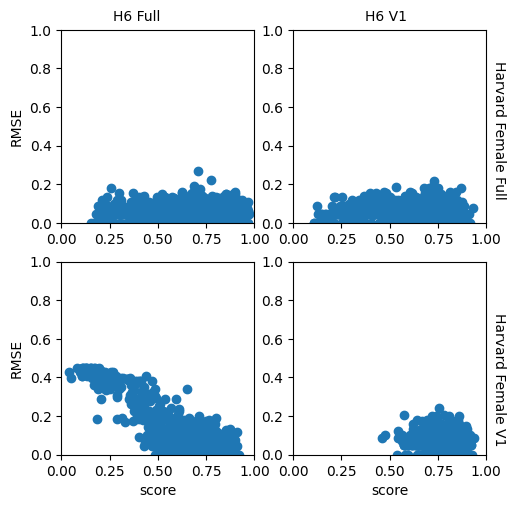

In [6]:
figure, grid = plot.subplots(2, 2, figsize=(5,5))
figure.subplots_adjust( 0.1, 0.1, 0.95, 0.95)

for ref, index in zip(["Harvard Female Full", "Harvard Female V1"], range(2)):
    figure.text(0.99,(1 - (index * (1 / 2) + (1/4))), ref, rotation=-90, va="center", ha="right")

for ref, index in zip(["H6 Full", "H6 V1"], range(2)):
    figure.text((index * (1 / 2) + (1/4)), 0.99, ref, ha="center", va="top")

for i in range(2):
    grid[i][0].set_ylabel("RMSE")

for i in range(2):
    grid[1][i].set_xlabel("score")

for ref, axes in zip(REFERENCE_DATASETS.keys(), grid):
    for tgt, ax in zip(TARGET_DATASETS.keys(), axes):
        score, accuracy = results[(ref, tgt)]

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.scatter(score,accuracy)

figure.savefig("../../output/spot_accuracy_correlation_excerpt.pdf")

array([[ 1.    , -0.5218],
       [-0.5218,  1.    ]])

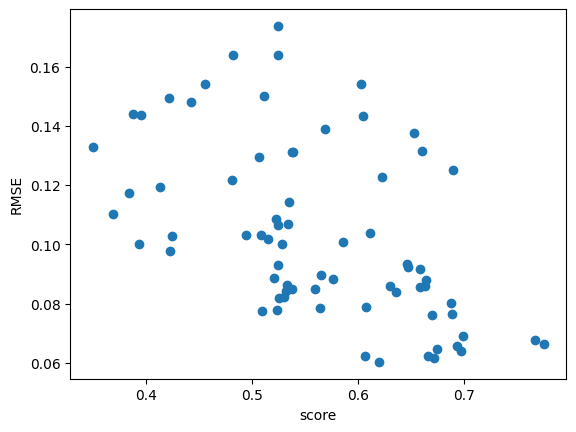

In [7]:
scores = []
accuracies = []

for key, (score, accuracy) in results.items():
    scores.append(score.mean())
    accuracies.append(accuracy.mean())

plot.xlabel("score")
plot.ylabel("RMSE")
plot.scatter(scores, accuracies)
np.corrcoef(scores, accuracies)

In [8]:
plot.rcParams.update({
    "text.usetex": True,
})

/var/folders/2j/mgb23mj938j7lcpf33rzf5m40000gp/T/ipykernel_81259/2076590783.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


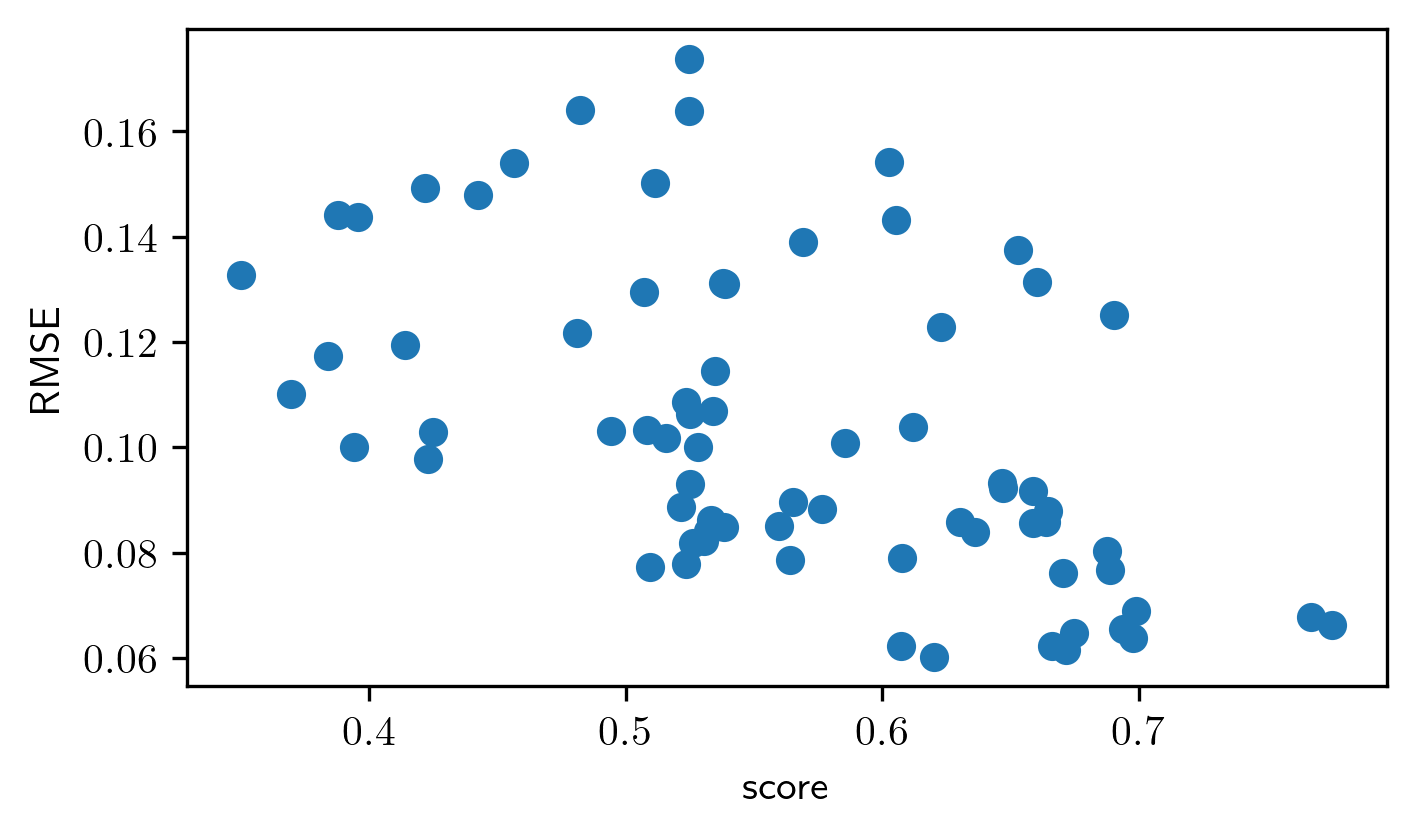

In [9]:
fig = plot.figure(figsize=(5, 3), dpi=300)
fig.subplots_adjust(left=0.15, right=0.95, bottom=0.15)
plt = fig.add_subplot()
plt.scatter(scores, accuracies)
plt.set_xlabel("score")
plt.set_ylabel("RMSE")
#plt.set_title("filter-genes = none (HCA dataset)")
fig.show()
fig.savefig("../../output/accuracy_correlation.pdf")